In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Descrição do Modelo de Clustering para Cartões de Crédito

O clustering de cartões de crédito é uma técnica de segmentação que agrupa portadores de cartões com base em características como hábitos de compra, limites de crédito e outros fatores financeiros. Essa abordagem utiliza Machine Learning para identificar padrões e formar grupos com perfis similares. A segmentação resultante auxilia empresas a desenvolver estratégias personalizadas, identificar clientes em potencial e otimizar campanhas de marketing. Este modelo é amplamente utilizado para entender comportamentos de consumo e melhorar a experiência do cliente.

In [91]:
#Importando as bibliotecas e chamando o dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster

df = pd.read_csv("/content/drive/MyDrive/000_Estudo/datasets/CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [92]:
#Entender como esses dados funcionam
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Basicamente cada variável respectivamente significa:

CUST_ID: Número de identificação único do cliente

BALANCE: Saldo na conta bancária do cliente

BALANCE_FREQUENCY: Frequência com que o saldo é atualizado na conta do cliente (1 significa frequentemente atualizado, e 0 significa raramente atualizado)

PURCHASES: Número de compras realizadas pelo cliente

ONEOFF_PURCHASES: Valor máximo de compras realizadas em uma única transação

INSTALLMENTS_PURCHASES: Valor das compras realizadas parceladas

CASH_ADVANCE: Adiantamento em dinheiro pago pelo cliente

PURCHASES_FREQUENCY: Frequência de compras realizadas (1 significa alta frequência, 0 significa baixa frequência)

ONEOFF_PURCHASES_FREQUENCY: Frequência de compras realizadas com pagamento único (1 significa alta frequência, 0
significa baixa frequência)

PURCHASES_INSTALLMENTS_FREQUENCY: Frequência de compras realizadas parceladas (1 significa alta frequência, 0 significa baixa frequência)

CASH_ADVANCE_FREQUENCY: Frequência de adiantamentos em dinheiro

CASH_ADVANCE_TRX: Número de transações de adiantamento em dinheiro

PURCHASES_TRX: Número de transações de compras realizadas

CREDIT_LIMIT: Limite de crédito do cliente

PAYMENTS: Valor dos pagamentos realizados pelo cliente

MINIMUM_PAYMENTS: Valor dos pagamentos mínimos realizados pelo cliente

PRC_FULL_PAYMENT: Percentual de pagamentos integrais realizados pelo cliente

TENURE: Tempo de uso do serviço de cartão de crédito pelo cliente

In [93]:
#Vendo se o dataset contém algum valor nulo
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [94]:
#Vou remover os valores nulos vistos anteriormente
df = df.dropna()

Temos 3 características principais nesse dataframe para realizar a segmentação:

BALANCE,
PURCHASES,
CREDIT_LIMIT

Esses três recursos são suficientes para agrupar os titulares de cartão de crédito, pois nos informam sobre o histórico de compras, saldo bancário e limite de crédito dos titulares de cartão de crédito. Então, vamos usar esses recursos para criar clusters a partir do conjunto de dados:


## Análise Exploratória dos Dados (EDA)

In [95]:
#Começando analisando uma estatística descritiva
df[['BALANCE','PURCHASES','CREDIT_LIMIT']].describe()

,BALANCE,PURCHASES,CREDIT_LIMIT
count,8636.000000,8636.000000,8636.000000
mean,1601.224893,1025.433874,4522.091030
std,2095.571300,2167.107984,3659.240379
min,0.000000,0.000000,50.000000
25%,148.095189,43.367500,1600.000000
50%,916.855459,375.405000,3000.000000
75%,2105.195853,1145.980000,6500.000000
max,19043.138560,49039.570000,30000.000000


Alta Variabilidade:

* Todas as variáveis apresentam altos desvios padrão, indicando grande heterogeneidade entre os clientes. Isso pode ser útil para o clustering, já que existem diferenças significativas entre os grupos.


Clientes com valores extremos:

* Existem clientes com saldo e compras zerados, bem como clientes com valores muito altos. Esses extremos podem impactar os resultados do clustering.


Estratificação Natural:
  

* Os quartis mostram que a maioria dos clientes tem valores bem menores que os máximos observados (long tail). Pode ser interessante agrupar clientes com limites e gastos altos separadamente.


<Axes: >

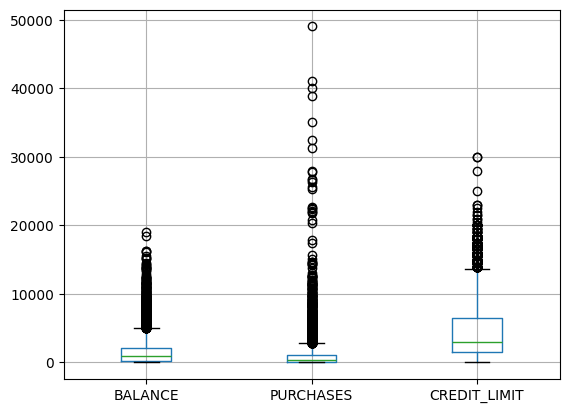

In [96]:
#plotando um gráfico de boxplot para analisar como estão distribuidos os outliers do conjunto de dados
df[['BALANCE','PURCHASES','CREDIT_LIMIT']].boxplot()

BALANCE (Saldo):

*   A maioria dos saldos está abaixo de 10.000, com mediana de R$ 916.
Muitos outliers acima do limite superior.

PURCHASES (Gastos):

*   Gastos concentrados abaixo de 1.500, com mediana de 375. Muitos outliers extremos, chegando a 50.000.

CREDIT_LIMIT (Limite de Crédito):

*   Limites mais dispersos, com mediana de 3.000 e muitos valores acima de 6.500. Outliers presentes, mas menos extremos que em PURCHASES.




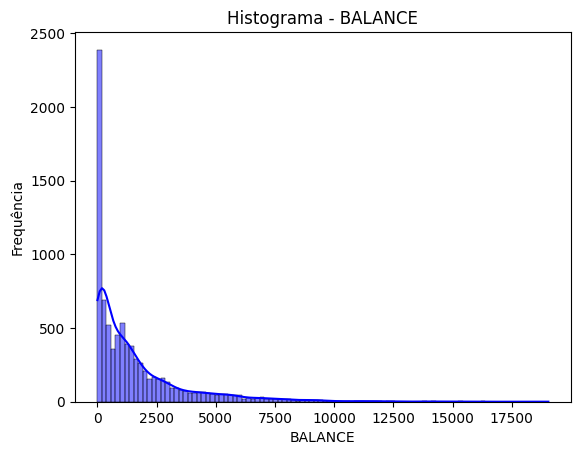

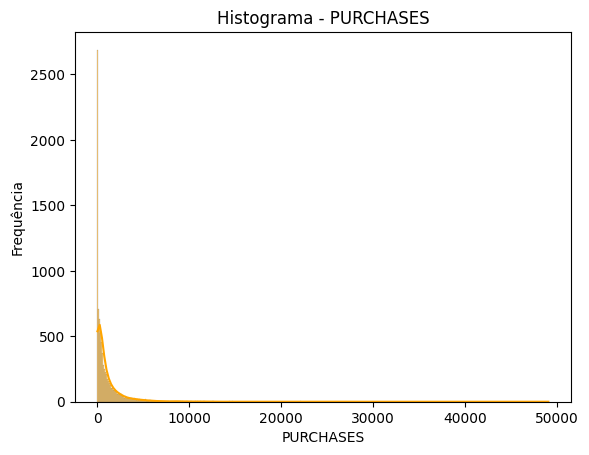

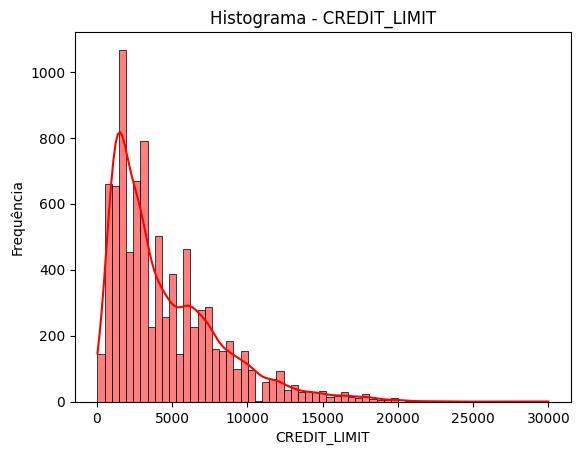

In [97]:
#Plotando um gráfico de Histograma para entender como as modas estão distribuidas
#Variável BALANCE
plt.figure()
sns.histplot(df['BALANCE'],kde=True,color='blue')
plt.title('Histograma - BALANCE')
plt.xlabel('BALANCE')
plt.ylabel('Frequência')

#Variável PURCHASES
plt.figure()
sns.histplot(df['PURCHASES'], kde=True, color='orange')
plt.title('Histograma - PURCHASES')
plt.xlabel('PURCHASES')
plt.ylabel('Frequência')

#Variável CREDIT_LIMIT
plt.figure()
sns.histplot(df['CREDIT_LIMIT'], kde=True, color='red')
plt.title('Histograma - CREDIT_LIMIT')
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('Frequência')

#plotando o gráfico:
plt.show()

Conclusões gerais:

*   Todas as variáveis apresentam distribuições assimétricas e caudas longas para a direita, indicando a presença de outliers.

*   Essas características sugerem a necessidade de normalização ou tratamento de outliers antes de aplicar algoritmos sensíveis, como o K-Means, para clustering ou análise mais avançada.





In [98]:
#Ajustando o padrão das variáveis para tratar de outliers com o MinMaxScaler também e inicializar o modelo.
clustering_df = df[['BALANCE','PURCHASES','CREDIT_LIMIT']]
from sklearn.preprocessing import MinMaxScaler
for i in clustering_df.columns:
    MinMaxScaler(i)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5) #5 clusters
clusters = kmeans.fit_predict(clustering_df)
df['CREDIT_CARD_SEGMENTS'] = clusters

Adicionei uma nova coluna como “CREDIT_CARD_SEGMENTS”. Contém rótulos sobre o grupo de clientes de cartão de crédito. Os grupos formados variam de 0 a 4. Para simplificar, transformarei os nomes desses clusters:



In [99]:
df["CREDIT_CARD_SEGMENTS"] = df["CREDIT_CARD_SEGMENTS"].map({0: "Cluster 1", 1:
    "Cluster 2", 2: "Cluster 3", 3: "Cluster 4", 4: "Cluster 5"})

print(df["CREDIT_CARD_SEGMENTS"].head(10))

0     Cluster 1
1     Cluster 4
2     Cluster 3
4     Cluster 1
5     Cluster 1
6     Cluster 2
7     Cluster 1
8     Cluster 3
9     Cluster 3
10    Cluster 1
Name: CREDIT_CARD_SEGMENTS, dtype: object


In [100]:
#Visualização dos clusters
import plotly.graph_objects as go

PLOT = go.Figure()
for i in list(df['CREDIT_CARD_SEGMENTS'].unique()):
    PLOT.add_trace(go.Scatter3d(x = df[df['CREDIT_CARD_SEGMENTS'] == i]['BALANCE'],
                                y = df[df['CREDIT_CARD_SEGMENTS'] == i]['PURCHASES'],
                                z = df[df['CREDIT_CARD_SEGMENTS'] == i]['CREDIT_LIMIT'],
                                mode = 'markers', marker_size = 6, marker_line_width = 1,
                                name = str(i)))

PLOT.update_traces(hovertemplate= 'BALANCE: %{x} <br>PURCHASES %{y} <br>CREDIT_LIMIT %{z}')

PLOT.update_layout(width=800, height=800, autosize=True, showlegend= True,
                   scene= dict(xaxis=dict(title = 'BALANCE', titlefont_color= 'black'),
                               yaxis=dict(title = 'PURCHASES', titlefont_color = 'black'),
                               zaxis=dict(title = 'CREDIT_LIMIT', titlefont_color = 'black')),
                   font=dict(family='Gilroy', color= 'black', size= 12))


In [101]:
# Normalizando os dados para aplicar efetivamente essa transformação
scaler = MinMaxScaler()
clustering_df_scaled = pd.DataFrame(scaler.fit_transform(clustering_df), columns=clustering_df.columns)

# Confirmando a normalização (valores entre 0 e 1)
print(clustering_df_scaled.describe())


           BALANCE    PURCHASES  CREDIT_LIMIT
count  8636.000000  8636.000000   8636.000000
mean      0.084084     0.020910      0.149319
std       0.110043     0.044191      0.122178
min       0.000000     0.000000      0.000000
25%       0.007777     0.000884      0.051753
50%       0.048146     0.007655      0.098497
75%       0.110549     0.023368      0.215359
max       1.000000     1.000000      1.000000


In [102]:
#Avaliando o Modelo com o cálculo de Silhouette Score
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(clustering_df_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.4644


In [103]:
#Vamos calcular o Davies-Bouldin Index para avaliar a separação e coesão dos clusters.

from sklearn.metrics import davies_bouldin_score

davies_bouldin = davies_bouldin_score(clustering_df_scaled, clusters)
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")

Davies-Bouldin Index: 1.0691


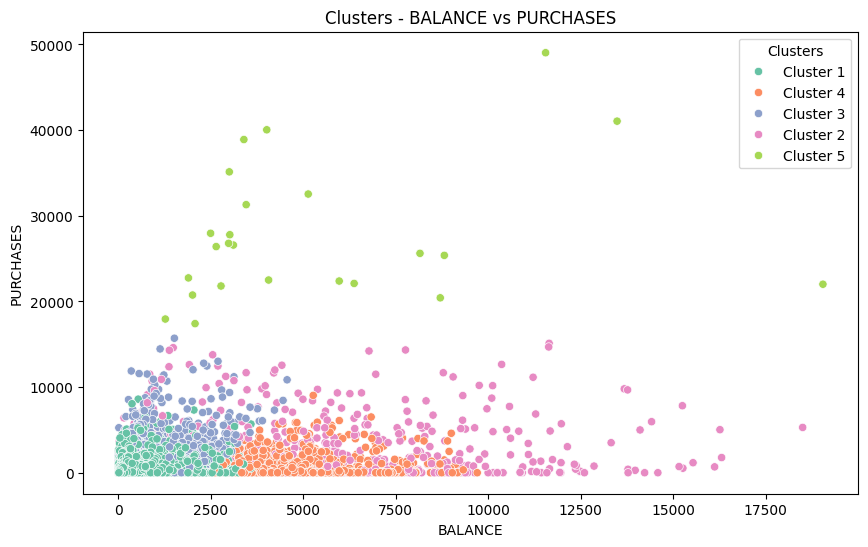

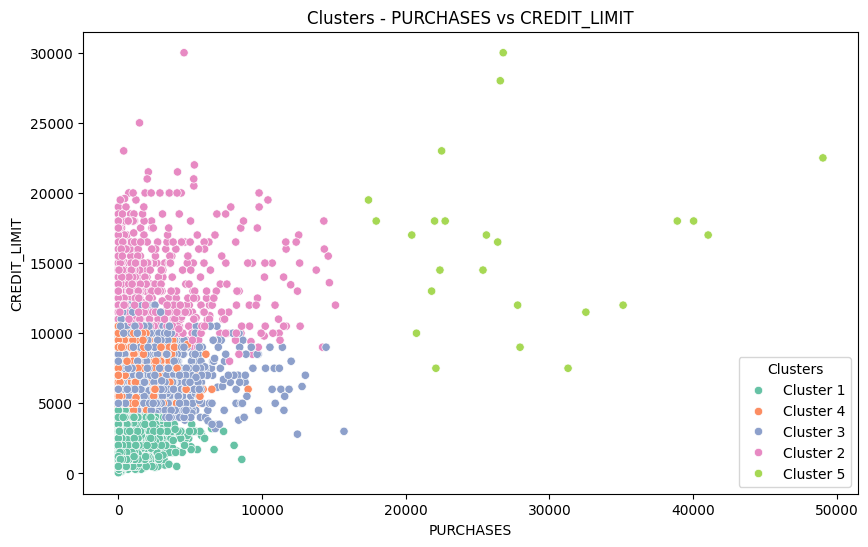

In [104]:
# Plot 2D - BALANCE vs PURCHASES
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BALANCE', y='PURCHASES', hue='CREDIT_CARD_SEGMENTS', palette='Set2')
plt.title('Clusters - BALANCE vs PURCHASES')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend(title='Clusters')
plt.show()

# Plot 2D - PURCHASES vs CREDIT_LIMIT
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PURCHASES', y='CREDIT_LIMIT', hue='CREDIT_CARD_SEGMENTS', palette='Set2')
plt.title('Clusters - PURCHASES vs CREDIT_LIMIT')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.legend(title='Clusters')
plt.show()

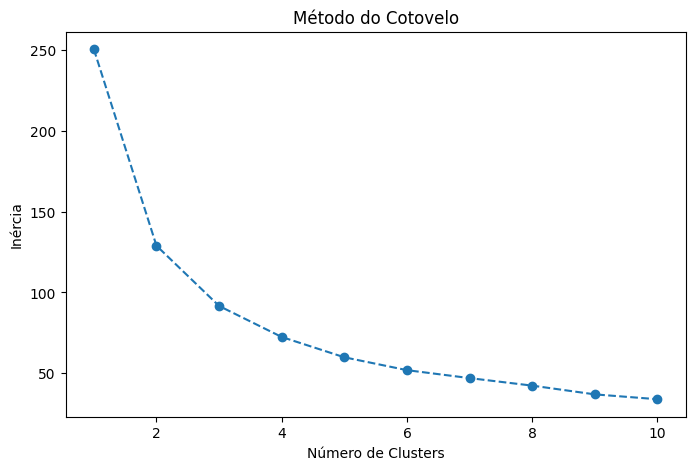

In [105]:
#Refinando o número de clusters testando outros valores:
inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_df_scaled)
    inertia.append(kmeans.inertia_)

# Plot do Método do Cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()



#Testando para 3 Cluster´s

In [106]:
#Ajustando o padrão das variáveis para tratar de outliers com o MinMaxScaler também e inicializar o modelo.
clustering_df = df[['BALANCE','PURCHASES','CREDIT_LIMIT']]
from sklearn.preprocessing import MinMaxScaler
for i in clustering_df.columns:
    MinMaxScaler(i)

from sklearn.cluster import KMeans
kmeans_3 = KMeans(n_clusters=3) #3 clusters
clusters = kmeans_3.fit_predict(clustering_df)
df['CREDIT_CARD_SEGMENTS'] = clusters

In [107]:
df["CREDIT_CARD_SEGMENTS"] = df["CREDIT_CARD_SEGMENTS"].map({0: "Cluster 1", 1:
    "Cluster 2", 2: "Cluster 3", 3: "Cluster 4", 4: "Cluster 5"})

print(df["CREDIT_CARD_SEGMENTS"].head(10))

0     Cluster 2
1     Cluster 1
2     Cluster 1
4     Cluster 2
5     Cluster 2
6     Cluster 3
7     Cluster 2
8     Cluster 1
9     Cluster 1
10    Cluster 2
Name: CREDIT_CARD_SEGMENTS, dtype: object


In [108]:
#Visualização dos clusters
import plotly.graph_objects as go

PLOT = go.Figure()
for i in list(df['CREDIT_CARD_SEGMENTS'].unique()):
    PLOT.add_trace(go.Scatter3d(x = df[df['CREDIT_CARD_SEGMENTS'] == i]['BALANCE'],
                                y = df[df['CREDIT_CARD_SEGMENTS'] == i]['PURCHASES'],
                                z = df[df['CREDIT_CARD_SEGMENTS'] == i]['CREDIT_LIMIT'],
                                mode = 'markers', marker_size = 6, marker_line_width = 1,
                                name = str(i)))

PLOT.update_traces(hovertemplate= 'BALANCE: %{x} <br>PURCHASES %{y} <br>CREDIT_LIMIT %{z}')

PLOT.update_layout(width=800, height=800, autosize=True, showlegend= True,
                   scene= dict(xaxis=dict(title = 'BALANCE', titlefont_color= 'black'),
                               yaxis=dict(title = 'PURCHASES', titlefont_color = 'black'),
                               zaxis=dict(title = 'CREDIT_LIMIT', titlefont_color = 'black')),
                   font=dict(family='Gilroy', color= 'black', size= 12))


In [109]:
# Normalizando os dados para aplicar efetivamente essa transformação
scaler = MinMaxScaler()
clustering_df_scaled = pd.DataFrame(scaler.fit_transform(clustering_df), columns=clustering_df.columns)

# Confirmando a normalização (valores entre 0 e 1)
print(clustering_df_scaled.describe())

           BALANCE    PURCHASES  CREDIT_LIMIT
count  8636.000000  8636.000000   8636.000000
mean      0.084084     0.020910      0.149319
std       0.110043     0.044191      0.122178
min       0.000000     0.000000      0.000000
25%       0.007777     0.000884      0.051753
50%       0.048146     0.007655      0.098497
75%       0.110549     0.023368      0.215359
max       1.000000     1.000000      1.000000


In [110]:
#Avaliando o Modelo com o cálculo de Silhouette Score

silhouette_avg_3 = silhouette_score(clustering_df_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg_3:.4f}")

Silhouette Score: 0.4603


In [111]:
#Vamos calcular o Davies-Bouldin Index para avaliar a separação e coesão dos clusters.

davies_bouldin_3 = davies_bouldin_score(clustering_df_scaled, clusters)
print(f"Davies-Bouldin Index: {davies_bouldin_3:.4f}")

Davies-Bouldin Index: 1.1350


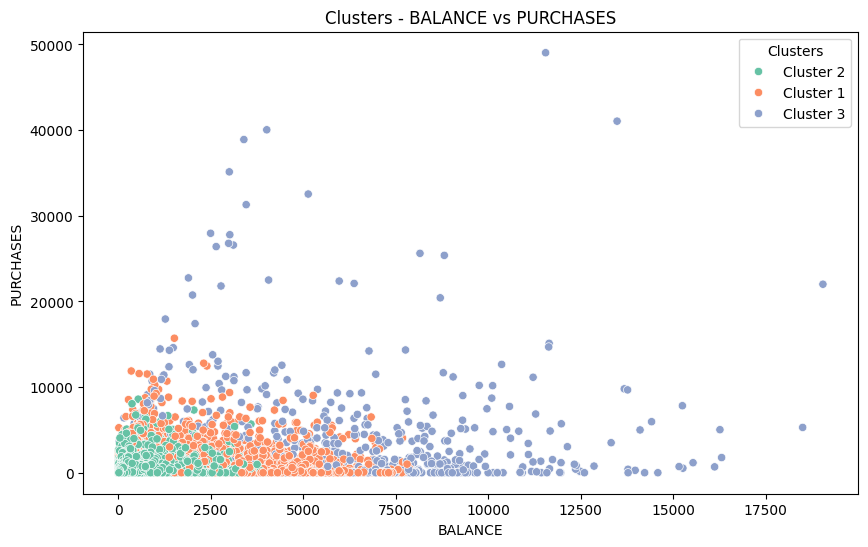

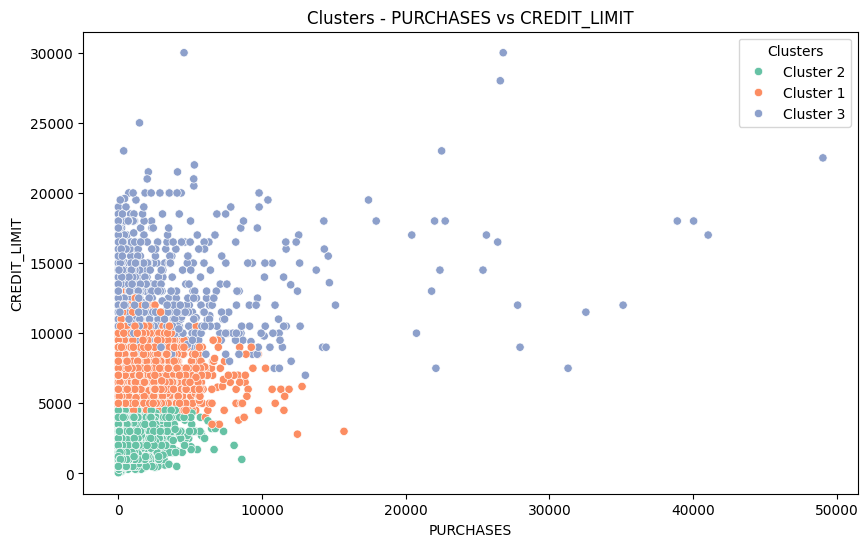

In [112]:
# Plot 2D - BALANCE vs PURCHASES
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BALANCE', y='PURCHASES', hue='CREDIT_CARD_SEGMENTS', palette='Set2')
plt.title('Clusters - BALANCE vs PURCHASES')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend(title='Clusters')
plt.show()

# Plot 2D - PURCHASES vs CREDIT_LIMIT
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PURCHASES', y='CREDIT_LIMIT', hue='CREDIT_CARD_SEGMENTS', palette='Set2')
plt.title('Clusters - PURCHASES vs CREDIT_LIMIT')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.legend(title='Clusters')
plt.show()

# Testando para 2 Cluster

In [113]:
#Ajustando o padrão das variáveis para tratar de outliers com o MinMaxScaler também e inicializar o modelo.
clustering_df = df[['BALANCE','PURCHASES','CREDIT_LIMIT']]
from sklearn.preprocessing import MinMaxScaler
for i in clustering_df.columns:
    MinMaxScaler(i)

from sklearn.cluster import KMeans
kmeans_2 = KMeans(n_clusters=2) #2 clusters
clusters = kmeans_2.fit_predict(clustering_df)
df['CREDIT_CARD_SEGMENTS'] = clusters

In [114]:
df["CREDIT_CARD_SEGMENTS"] = df["CREDIT_CARD_SEGMENTS"].map({0: "Cluster 1", 1:
    "Cluster 2", 2: "Cluster 3", 3: "Cluster 4", 4: "Cluster 5"})

print(df["CREDIT_CARD_SEGMENTS"].head(10))

0     Cluster 2
1     Cluster 1
2     Cluster 1
4     Cluster 2
5     Cluster 2
6     Cluster 1
7     Cluster 2
8     Cluster 1
9     Cluster 1
10    Cluster 2
Name: CREDIT_CARD_SEGMENTS, dtype: object


In [115]:
#Visualização dos clusters
import plotly.graph_objects as go

PLOT = go.Figure()
for i in list(df['CREDIT_CARD_SEGMENTS'].unique()):
    PLOT.add_trace(go.Scatter3d(x = df[df['CREDIT_CARD_SEGMENTS'] == i]['BALANCE'],
                                y = df[df['CREDIT_CARD_SEGMENTS'] == i]['PURCHASES'],
                                z = df[df['CREDIT_CARD_SEGMENTS'] == i]['CREDIT_LIMIT'],
                                mode = 'markers', marker_size = 6, marker_line_width = 1,
                                name = str(i)))

PLOT.update_traces(hovertemplate= 'BALANCE: %{x} <br>PURCHASES %{y} <br>CREDIT_LIMIT %{z}')

PLOT.update_layout(width=800, height=800, autosize=True, showlegend= True,
                   scene= dict(xaxis=dict(title = 'BALANCE', titlefont_color= 'black'),
                               yaxis=dict(title = 'PURCHASES', titlefont_color = 'black'),
                               zaxis=dict(title = 'CREDIT_LIMIT', titlefont_color = 'black')),
                   font=dict(family='Gilroy', color= 'black', size= 12))

In [116]:
# Normalizando os dados para aplicar efetivamente essa transformação
scaler = MinMaxScaler()
clustering_df_scaled = pd.DataFrame(scaler.fit_transform(clustering_df), columns=clustering_df.columns)

# Confirmando a normalização (valores entre 0 e 1)
print(clustering_df_scaled.describe())

           BALANCE    PURCHASES  CREDIT_LIMIT
count  8636.000000  8636.000000   8636.000000
mean      0.084084     0.020910      0.149319
std       0.110043     0.044191      0.122178
min       0.000000     0.000000      0.000000
25%       0.007777     0.000884      0.051753
50%       0.048146     0.007655      0.098497
75%       0.110549     0.023368      0.215359
max       1.000000     1.000000      1.000000


In [117]:
#Avaliando o Modelo com o cálculo de Silhouette Score

silhouette_avg_2 = silhouette_score(clustering_df_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg_2:.4f}")

Silhouette Score: 0.5307


In [118]:
#Vamos calcular o Davies-Bouldin Index para avaliar a separação e coesão dos clusters.

davies_bouldin_2 = davies_bouldin_score(clustering_df_scaled, clusters)
print(f"Davies-Bouldin Index: {davies_bouldin_2:.4f}")

Davies-Bouldin Index: 0.9368


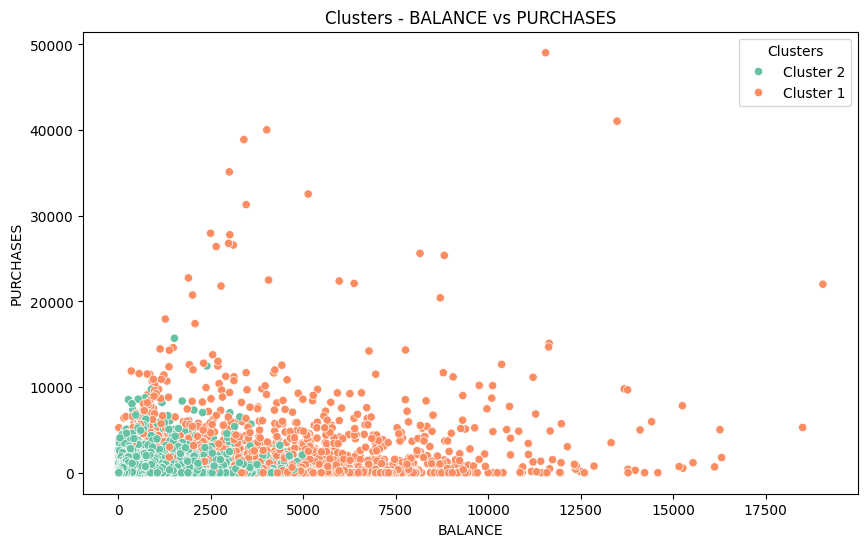

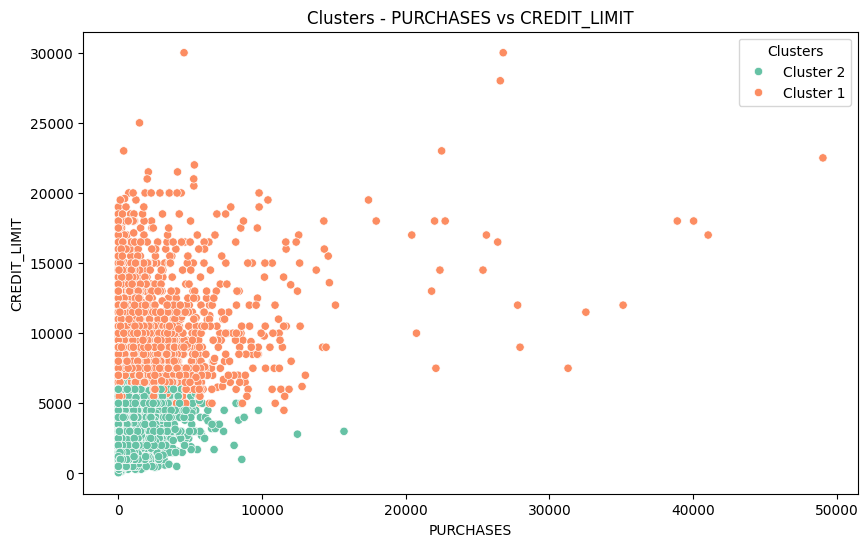

In [119]:
# Plot 2D - BALANCE vs PURCHASES
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BALANCE', y='PURCHASES', hue='CREDIT_CARD_SEGMENTS', palette='Set2')
plt.title('Clusters - BALANCE vs PURCHASES')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend(title='Clusters')
plt.show()

# Plot 2D - PURCHASES vs CREDIT_LIMIT
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PURCHASES', y='CREDIT_LIMIT', hue='CREDIT_CARD_SEGMENTS', palette='Set2')
plt.title('Clusters - PURCHASES vs CREDIT_LIMIT')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.legend(title='Clusters')
plt.show()

--------------------------------------------------------------------------------

# Interpretação dos Resultados:


##Para 5 Clusters -

Silhouette Score: 0.4644

*   Um valor de 0.4644 indica uma segmentação razoável, mas com menos coesão e separação entre os clusters comparado ao modelo de 2 clusters. Isso pode significar que alguns grupos estão mais sobrepostos ou não têm uma estrutura tão clara.


Davies-Bouldin Index: 1.0691

*   Esse valor é maior do que o modelo de 2 clusters (0.9368), indicando que os clusters são menos compactos e estão menos bem separados.


Conclusão: O modelo com 5 clusters não apresenta uma segmentação tão clara quanto o modelo de 2 clusters, e há maior sobreposição entre os grupos. A separação adicional pode não ser prática ou relevante para o caso de uso.

--------------------------------------------------------------------------------

## Para 3 Clusters -

Silhouette Score: 0.4603

*   O score é similar ao modelo de 5 clusters, indicando que a separação e coesão dos clusters não são tão boas quanto no modelo de 2 clusters.

Davies-Bouldin Index: 1.1350

*   Esse índice é o pior entre os três casos analisados, sugerindo que os clusters são menos compactos e mais sobrepostos do que nos modelos de 2 ou 5 clusters.



Conclusão: Embora 3 clusters sejam visivelmente interpretáveis no gráfico, os números indicam que este modelo é menos eficiente do que o de 2 clusters. A segmentação com 3 clusters é mais fraca em termos de compactação e separação

--------------------------------------------------------------------------------

## Para 2 Clusters -

Silhouette Score (0.5307):

Este valor indica uma boa separação e coesão entre os clusters. Um score acima de 0.5 é geralmente considerado bom em problemas de clustering, o que significa que os grupos são bem definidos e os pontos estão mais próximos do centro do cluster ao qual pertencem.



Davies-Bouldin Index (0.9368):

Um valor abaixo de 1 sugere uma segmentação muito boa, com os clusters sendo bem separados e compactos. Isso valida que 2 clusters oferecem uma melhor segmentação em comparação com o modelo de 3 clusters analisado anteriormente.



Por que usar clustering neste caso:

O método de clustering ajuda a segmentar clientes de cartões de crédito com base em características comportamentais e financeiras, como limites de crédito e compras. Isso permite que a empresa:

*   Personalize estratégias de marketing, focando em clientes com comportamentos específicos.

*   Identifique oportunidades de vendas cruzadas ou up-selling.

*   Otimize a experiência do cliente, oferecendo serviços mais direcionados.

*   Com a abordagem de 2 clusters, a segmentação torna-se mais interpretável e prática para uso em estratégias comerciais.





---------------------------------------------------------------------------------